In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/Employee_Salary_Dataset.csv")

In [ ]:
df.head()

,ID,Experience_Years,Age,Gender,Salary
0,1,5,28,Female,250000
1,2,1,21,Male,50000
2,3,3,23,Female,170000
3,4,2,22,Male,25000
4,5,1,17,Male,10000


In [ ]:
df.isnull().sum()

ID                  0
Experience_Years    0
Age                 0
Salary              0
Gender_Male         0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.dtypes

ID                   int64
Experience_Years     int64
Age                  int64
Gender              object
Salary               int64
dtype: object

In [ ]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [ ]:
df.dtypes

ID                  int64
Experience_Years    int64
Age                 int64
Salary              int64
Gender_Male          bool
dtype: object

In [ ]:
X = df.iloc[:, 1:2]  # Selecting the 2nd column as feature
y = df.iloc[:, -1]   # Selecting the last column as target variable


In [ ]:
df.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of     ID  Experience_Years  Age    Salary  Gender_Male
0    1                 5   28    250000        False
1    2                 1   21     50000         True
2    3                 3   23    170000        False
3    4                 2   22     25000         True
4    5                 1   17     10000         True
5    6                25   62   5001000         True
6    7                19   54    800000        False
7    8                 2   21      9000        False
8    9                10   36     61500        False
9   10                15   54    650000        False
10  11                 4   26    250000        False
11  12                 6   29   1400000         True
12  13                14   39   6000050         True
13  14                11   40    220100         True
14  15                 2   23      7500         True
15  16                 4   27     87000        False
16  17                10   34    930000        False
17  18                15   54   7900000        False
18  19                 2   21     15000         True
19  20                10   36    330000         True
20  21                15   54   6570000         True
21  22                 4   26     25000         True
22  23                 5   29   6845000         True
23  24                 1   21      6000        False
24  25                 4   23      8900        False
25  26                 3   22     20000        False
26  27                 1   18      3000         True
27  28                27   62  10000000        False
28  29                19   54   5000000        False
29  30                 2   21      6100        False
30  31                10   34     80000         True
31  32                15   54    900000         True
32  33                20   55   1540000        False
33  34                19   53   9300000        False
34  35                16   49   7600000         True>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Mean Squared Error: 0.26614179753881007
R-squared: -0.0867456732834746


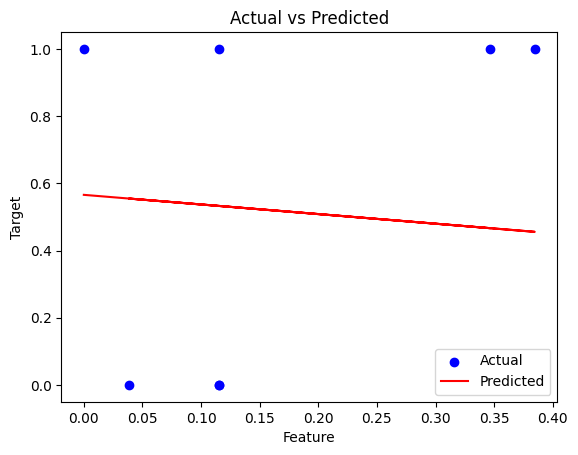

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Test the model's accuracy
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize the model's predictions
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

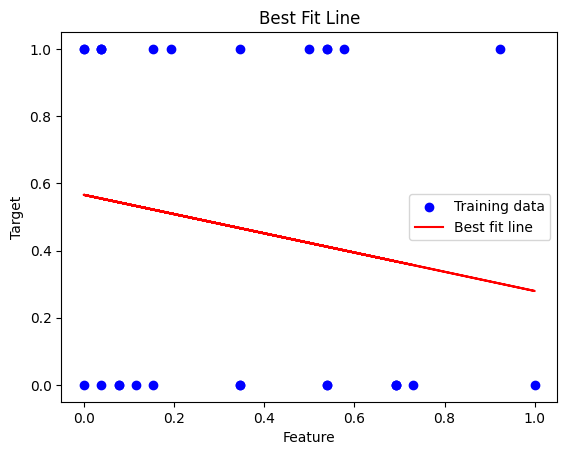

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of the training data
plt.scatter(X_train, y_train, color='blue', label='Training data')

# Plot the best fit line
plt.plot(X_train, model.coef_ * X_train + model.intercept_, color='red', label='Best fit line')

# Add labels and legend
plt.title('Best Fit Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Display the plot
plt.show()


In [ ]:
X_input = [[5], [30], [25]]
y_pred = model.predict(X_input)
trend = None
for i in range(1, len(y_pred)):
    if y_pred[i] > y_pred[i - 1]:
        trend = "Increase"
    elif y_pred[i] < y_pred[i - 1]:
        trend = "Decrease"
    else:
        trend = "Constant"
    print(f"Prediction {i}: {trend}")


Prediction 1: Decrease
Prediction 2: Increase
